In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [2]:
df_train_features = pd.read_csv('data/dengue_features_train.csv', index_col=[0,1,2])
df_train_labels = pd.read_csv('data/dengue_labels_train.csv', index_col=[0,1,2])

In [3]:
df_train_features.head()

week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
city year weekofyear                                                           
sj   1990 18              1990-04-30  0.122600  0.103725  0.198483  0.177617   
          19              1990-05-07  0.169900  0.142175  0.162357  0.155486   
          20              1990-05-14  0.032250  0.172967  0.157200  0.170843   
          21              1990-05-21  0.128633  0.245067  0.227557  0.235886   
          22              1990-05-28  0.196200  0.262200  0.251200  0.247340   

                      precipitation_amt_mm  reanalysis_air_temp_k  \
city year weekofyear                                                
sj   1990 18                         12.42             297.572857   
          19                         22.82             298.211429   
          20                         34.54             298.781429   
          21                         15.36             298.987143   
          22                          7.52             299.518571   

                      reanalysis_avg_temp_k  reanalysis_dew_point_temp_k  \
city year weekofyear                                                       
sj   1990 18                     297.742857                   292.414286   
          19                     298.442857                   293.951429   
          20                     298.878571                   295.434286   
          21                     299.228571                   295.310000   
          22                     299.664286                   295.821429   

                      reanalysis_max_air_temp_k  ...  \
city year weekofyear                             ...   
sj   1990 18                              299.8  ...   
          19                              300.9  ...   
          20                              300.5  ...   
          21                              301.4  ...   
          22                              301.9  ...   

                      reanalysis_precip_amt_kg_per_m2  \
city year weekofyear                                    
sj   1990 18                                    32.00   
          19                                    17.94   
          20                                    26.10   
          21                                    13.90   
          22                                    12.20   

                      reanalysis_relative_humidity_percent  \
city year weekofyear                                         
sj   1990 18                                     73.365714   
          19                                     77.368571   
          20                                     82.052857   
          21                                     80.337143   
          22                                     80.460000   

                      reanalysis_sat_precip_amt_mm  \
city year weekofyear                                 
sj   1990 18                                 12.42   
          19                                 22.82   
          20                                 34.54   
          21                                 15.36   
          22                                  7.52   

                      reanalysis_specific_humidity_g_per_kg  \
city year weekofyear                                          
sj   1990 18                                      14.012857   
          19                                      15.372857   
          20                                      16.848571   
          21                                      16.672857   
          22                                      17.210000   

                      reanalysis_tdtr_k  station_avg_temp_c  \
city year weekofyear                                          
sj   1990 18                   2.628571           25.442857   
          19                   2.371429           26.714286   
          20                   2.300000           26.714286   
          21                   2.428571           27.471429   
          22    

We have 19 useable features after excluding city, year, weekofyear and week_start_date. <br>
All are float type <br>
9 are related to temperature <br>
4 are related to vegetation <br>
6 are related to precipitation/humidity etc. <br>

In [4]:
df_train_features.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1456 entries, ('sj', 1990, 18) to ('iq', 2010, 25)
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   week_start_date                        1456 non-null   object 
 1   ndvi_ne                                1262 non-null   float64
 2   ndvi_nw                                1404 non-null   float64
 3   ndvi_se                                1434 non-null   float64
 4   ndvi_sw                                1434 non-null   float64
 5   precipitation_amt_mm                   1443 non-null   float64
 6   reanalysis_air_temp_k                  1446 non-null   float64
 7   reanalysis_avg_temp_k                  1446 non-null   float64
 8   reanalysis_dew_point_temp_k            1446 non-null   float64
 9   reanalysis_max_air_temp_k              1446 non-null   float64
 10  reanalysis_min_air_temp_k              1446 n

### Seperating data for SJ and IQ

We have 936 data points for San Juan and only 520 data points for Iquitos.<br>
For San Juan, we have data from 1990 to 2000. <br>
For Iquitos, we have data from 2000 to 2010.

In [5]:
df_train_features_sj = df_train_features.loc['sj']
print('San Juan:')
print('Total number of examples: ',df_train_features_sj.shape[0])
print('Per year counts:\n', df_train_features_sj.index.get_level_values('year').value_counts().sort_index())

print('Iquitos:')
df_train_features_iq = df_train_features.loc['iq']
print('\nTotal number of examples: ', df_train_features_iq.shape[0])
print('Per year counts:\n', df_train_features_iq.index.get_level_values('year').value_counts().sort_index())

San Juan:
Total number of examples:  936
Per year counts:
 1990    35
1991    52
1992    52
1993    52
1994    52
1995    52
1996    52
1997    52
1998    52
1999    52
2000    52
2001    52
2002    52
2003    52
2004    52
2005    52
2006    52
2007    52
2008    17
Name: year, dtype: int64
Iquitos:

Total number of examples:  520
Per year counts:
 2000    26
2001    52
2002    52
2003    52
2004    52
2005    52
2006    52
2007    52
2008    52
2009    52
2010    26
Name: year, dtype: int64


### Missing Data

In [6]:
percent_missing_sj = 100*df_train_features_sj.isnull().sum()/len(df_train_features_sj)
percent_missing_iq = 100*df_train_features_iq.isnull().sum()/len(df_train_features_iq)
df_missing_stats = pd.DataFrame({'column_name' : df_train_features_sj.columns, 'precent_missing_sj' : percent_missing_sj, 
                                 'precent_missing_iq' : percent_missing_iq})
df_missing_stats

,column_name,precent_missing_sj,precent_missing_iq
week_start_date,week_start_date,0.000000,0.000000
ndvi_ne,ndvi_ne,20.405983,0.576923
ndvi_nw,ndvi_nw,5.235043,0.576923
ndvi_se,ndvi_se,2.029915,0.576923
ndvi_sw,ndvi_sw,2.029915,0.576923
precipitation_amt_mm,precipitation_amt_mm,0.961538,0.769231
reanalysis_air_temp_k,reanalysis_air_temp_k,0.641026,0.769231
reanalysis_avg_temp_k,reanalysis_avg_temp_k,0.641026,0.769231
reanalysis_dew_point_temp_k,reanalysis_dew_point_temp_k,0.641026,0.769231
reanalysis_max_air_temp_k,reanalysis_max_air_temp_k,0.641026,0.769231


ndvi_ne has 20% missing values for SJ so we will look at that. From the graph we see that year 194 is the most problematic as it has 35th week or so. We can consider linear interpolation to fill in data for this particular varible and forward fill for all other variables whi:

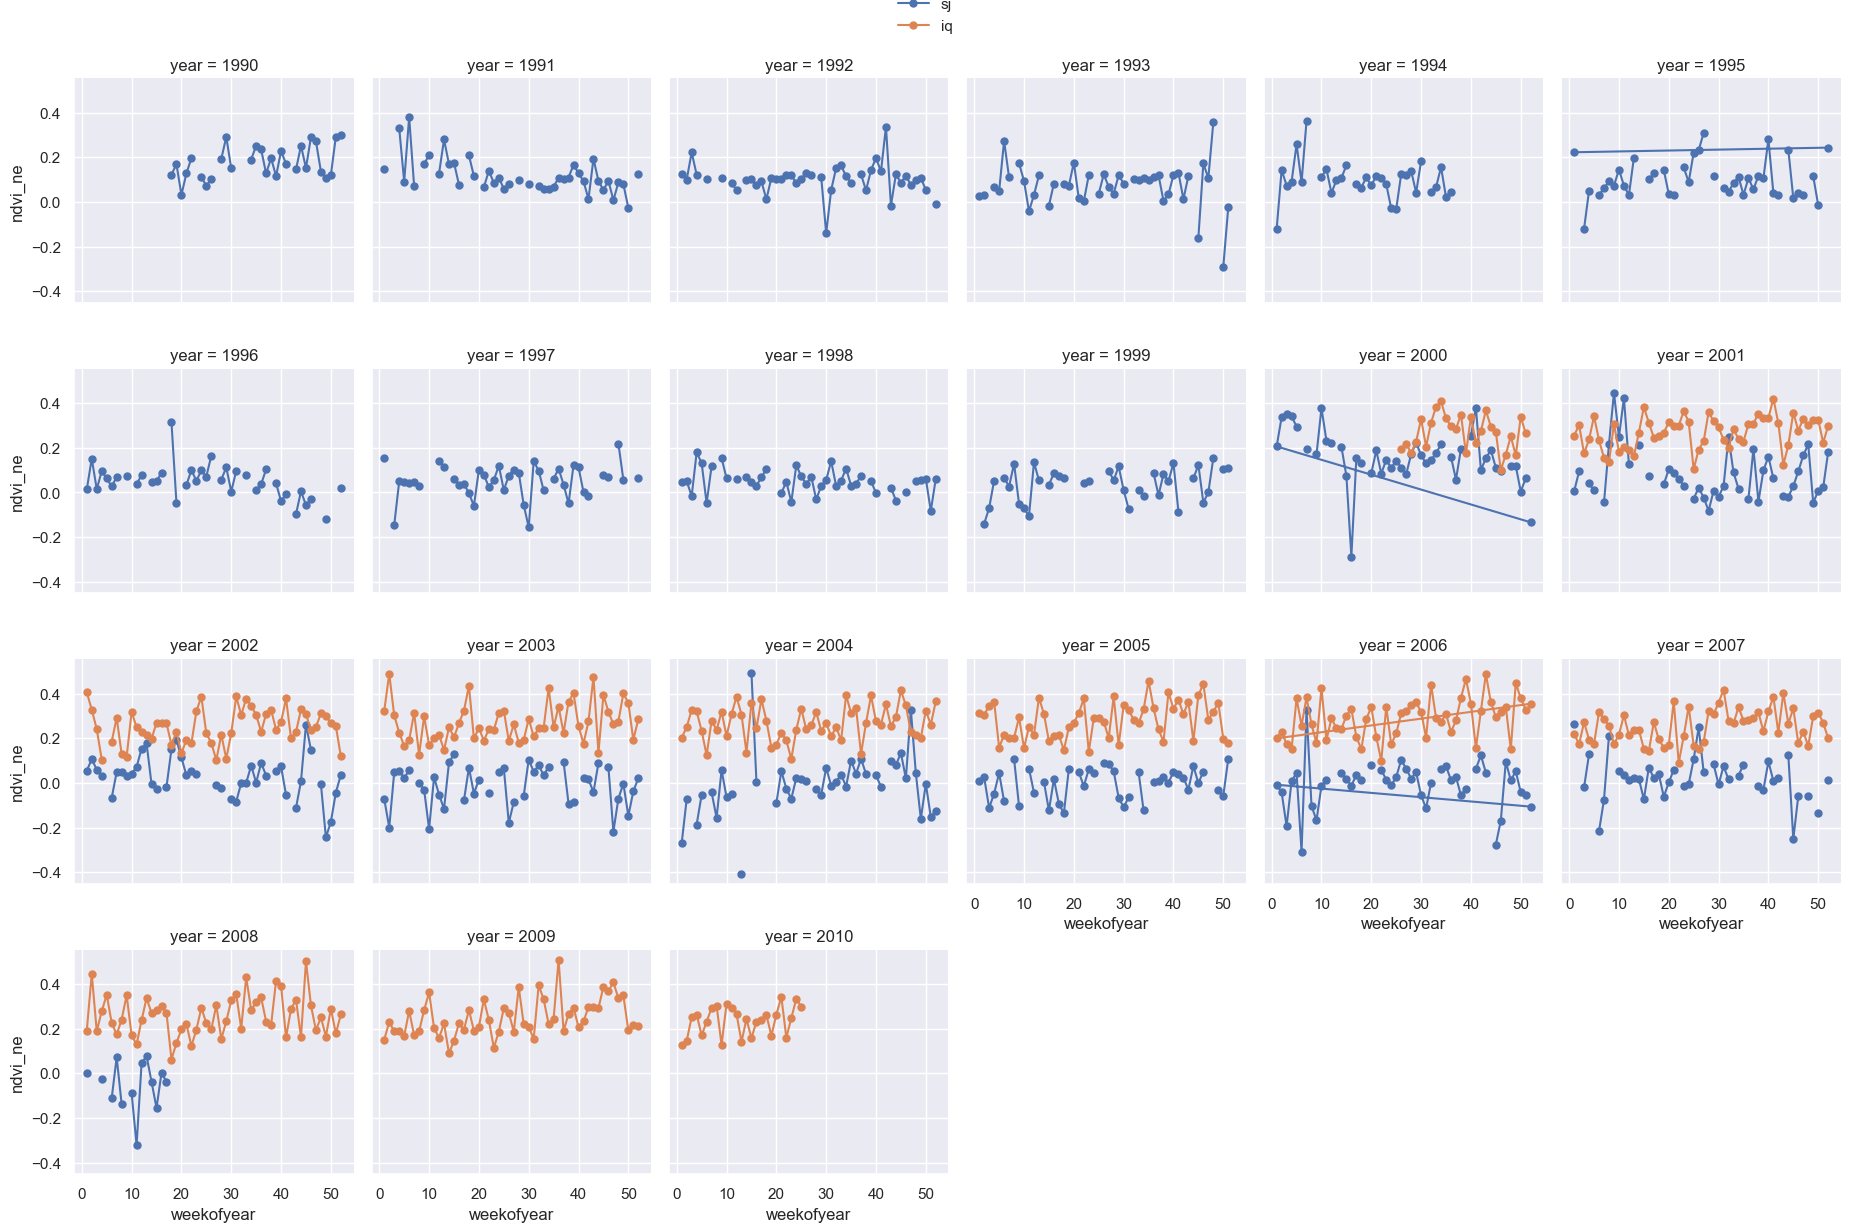

In [7]:
sns.set(rc={'figure.figsize':(20,35)})
graph = sns.FacetGrid(df_train_features.reset_index(),col='year', hue='city', col_wrap=6)
graph.map_dataframe(plt.plot,'weekofyear','ndvi_ne', marker = '.', markersize = 10).add_legend(loc='upper center',borderaxespad=-2)
plt.tight_layout()
plt.show()